# Fed Interest Rates Simulation using the Vasicek Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter as ff
%matplotlib inline

In [3]:
# Vasicek model parameters
a = 22.57           # Mean reversion speed
b = 0.0617          # Long-term mean
sigma = 0.02        # Volatility

In [4]:
# Other inputs for the Vasicek models
r0 = 0.055       # Current Fed Interest Rate - as per last FOMC meeting
T = 10           # Time horizon for the forecast (10 years by default)
n = 12           # Time steps per year
N = T*n          # Total time steps
dt = T/N         # Length of each time interval
M = 100          # Total number of simulations

In [5]:
# Generating random variable for the Weiner process
dw = np.random.randn(M,N)

# Initializing a matrix to store the calculated interest rates
rates = r0*np.ones((M,N+1))

## The Vasicek Model
$$r_{i+dt} = r_i + a(b-r_i)dt + \sigma.W.\sqrt{dt}$$

In [7]:
# Creating the Vasicek model
for i in range(0,N):
    rates[:,i+1] = rates[:,i] + a*(b-rates[:,i])*dt + sigma*dw[:,i]*np.sqrt(dt)
    
rates

array([[0.055     , 0.06816153, 0.05392904, ..., 0.06409539, 0.06086171,
        0.07361052],
       [0.055     , 0.07684905, 0.03894904, ..., 0.05367321, 0.07191098,
        0.05019683],
       [0.055     , 0.07193076, 0.0482188 , ..., 0.08095473, 0.04614765,
        0.06960363],
       ...,
       [0.055     , 0.0716596 , 0.05801794, ..., 0.05867942, 0.06422546,
        0.06616481],
       [0.055     , 0.0596289 , 0.05674961, ..., 0.06094628, 0.06243318,
        0.0675014 ],
       [0.055     , 0.06320625, 0.05440513, ..., 0.06395273, 0.06561651,
        0.05370465]])

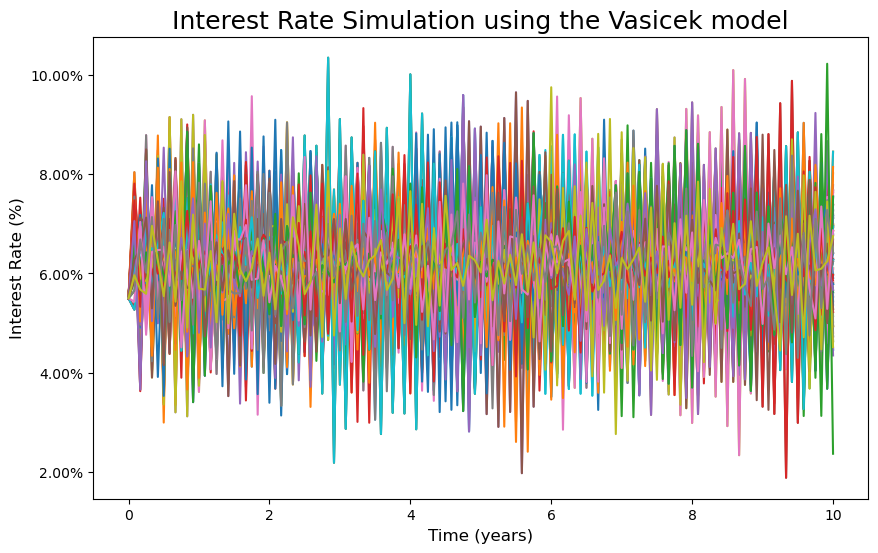

In [8]:
plt.figure(figsize=(10,6))

a = [np.random.randint(0,M) for j in range(1,M)]

for m in a:
    plt.plot(np.linspace(0,T,N+1),rates[m])
    plt.xlabel('Time (years)', fontsize=12)
    plt.ylabel('Interest Rate (%)', fontsize=12)
    plt.title('Interest Rate Simulation using the Vasicek model', fontsize=18)

        
# Function to format y-axis values to percentages
def to_percent(y, _):
    return f'{y * 100:.2f}%'

# Applying the percentage formatting to y-axis ticks
plt.gca().yaxis.set_major_formatter(ff(to_percent))

plt.show()

In [9]:
# Getting the average interest rate forecasts
mean_rates = np.zeros(N+1)

for i in range(0,N):
    mean_rates[i] = np.mean(rates[:, i])
    
mean_rates_cleaned = np.delete(mean_rates, N)
mean_rates_cleaned

array([0.055     , 0.06729849, 0.05596133, 0.06786649, 0.05635322,
       0.0674575 , 0.05578978, 0.06692612, 0.05813783, 0.06440288,
       0.05931072, 0.06407542, 0.05921108, 0.06416226, 0.05886495,
       0.06335323, 0.05997028, 0.06345632, 0.0602184 , 0.06277211,
       0.06194779, 0.06118402, 0.06259916, 0.06027826, 0.06138014,
       0.06172312, 0.06114122, 0.06181164, 0.06157478, 0.06221596,
       0.06186395, 0.06082627, 0.0627434 , 0.06097841, 0.06272911,
       0.06155641, 0.0619881 , 0.06143863, 0.06166054, 0.06235023,
       0.06132025, 0.06190567, 0.06088774, 0.06274628, 0.06029352,
       0.06372212, 0.05951413, 0.06316561, 0.05981889, 0.06321714,
       0.05989175, 0.06370194, 0.05941562, 0.06397216, 0.05961986,
       0.06496372, 0.05989865, 0.06368795, 0.05994724, 0.06297489,
       0.06084592, 0.06246314, 0.05996105, 0.06347958, 0.06107253,
       0.06235029, 0.06050179, 0.06351426, 0.05951907, 0.0629548 ,
       0.06145809, 0.0623132 , 0.06005959, 0.06274987, 0.06176

Text(0.5, 1.0, 'IR Simulation using the Vasicek model')

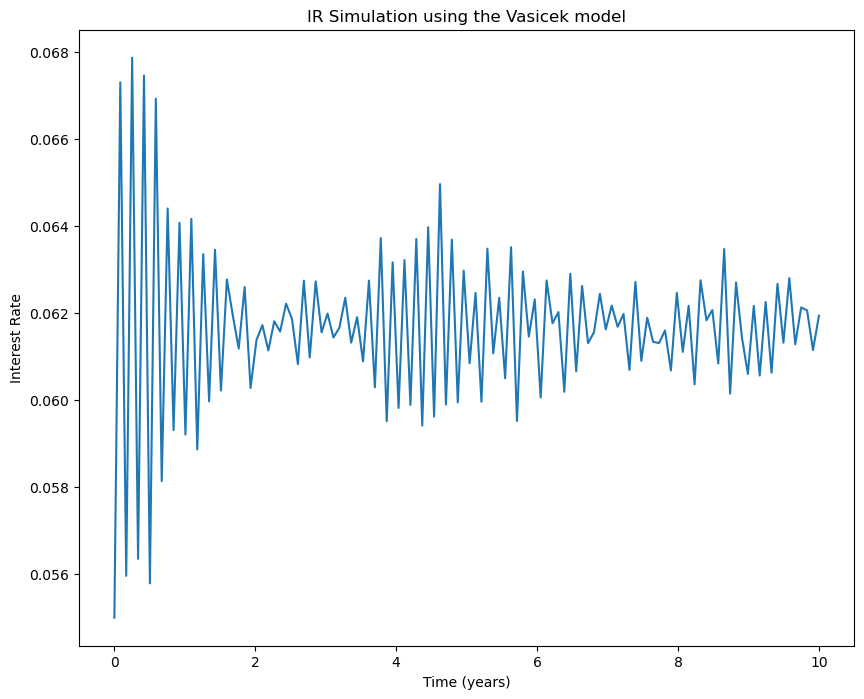

In [10]:
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,T,N),mean_rates_cleaned)
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate')
plt.title('IR Simulation using the Vasicek model')

In [11]:
rates[:,:12]
yr_1_rates = []

for i in range(100):
    for k in range(12):
        yr_1_rates.append(rates[i,k])

yr_1_rates
# pd.DataFrame(rates[:,:12]).to_csv('test.csv')

[0.055,
 0.06816153093524047,
 0.05392904167254014,
 0.07226058966125393,
 0.05079903020789018,
 0.08523380379262507,
 0.04066864974129435,
 0.09313659985823593,
 0.03190740500365018,
 0.08846691773965462,
 0.028343139152643377,
 0.09722085714705635,
 0.055,
 0.07684905408320104,
 0.03894904197074572,
 0.08212274448539851,
 0.04689667703747555,
 0.07871303575716855,
 0.046836813002821394,
 0.07512533791113608,
 0.04921666415283887,
 0.07203930442285329,
 0.05806359622975877,
 0.0660616536691583,
 0.055,
 0.0719307633299494,
 0.04821879874493662,
 0.07345851377238154,
 0.04641341784664133,
 0.08131084715500342,
 0.03795416454074736,
 0.08355386635714632,
 0.05050918903385068,
 0.07173036725003898,
 0.039783108911491116,
 0.08312441070740358,
 0.055,
 0.06870309482100125,
 0.05929353858980039,
 0.06819187362144402,
 0.061038277025692596,
 0.07126630263549451,
 0.057681427414061646,
 0.0678202651531772,
 0.06088897121292195,
 0.07135779917330312,
 0.04373567979115822,
 0.08518514938189223

In [12]:
average_rate = np.mean(mean_rates_cleaned)
average_rate
sd_rate = np.std(mean_rates_cleaned)
sd_rate

0.001960783310830616

In [13]:
average_rate

0.061662362116110835

In [14]:
rates[:,11]

array([0.09722086, 0.06606165, 0.08312441, 0.08518515, 0.07401896,
       0.05618816, 0.07210622, 0.0532363 , 0.07449001, 0.06009245,
       0.0595454 , 0.07800267, 0.03408213, 0.07182608, 0.07388016,
       0.07571378, 0.04523355, 0.06145772, 0.04725517, 0.07113319,
       0.06206429, 0.06614762, 0.06999064, 0.05098854, 0.07064691,
       0.05937435, 0.0708336 , 0.05970762, 0.08240854, 0.04791025,
       0.05504606, 0.07837434, 0.0798301 , 0.06832304, 0.05101111,
       0.06484701, 0.07582899, 0.05087516, 0.07040584, 0.02191403,
       0.05886615, 0.05560044, 0.05906259, 0.06737511, 0.0803953 ,
       0.07058672, 0.05100427, 0.05781077, 0.07430288, 0.06601796,
       0.06341635, 0.04965348, 0.0570184 , 0.06822209, 0.05728768,
       0.07103799, 0.05362353, 0.06540999, 0.04909948, 0.07693055,
       0.07283099, 0.0805964 , 0.06149604, 0.07011066, 0.07148683,
       0.06617425, 0.05861981, 0.0370317 , 0.07441177, 0.07510267,
       0.06291527, 0.05867268, 0.0592598 , 0.06743922, 0.05845

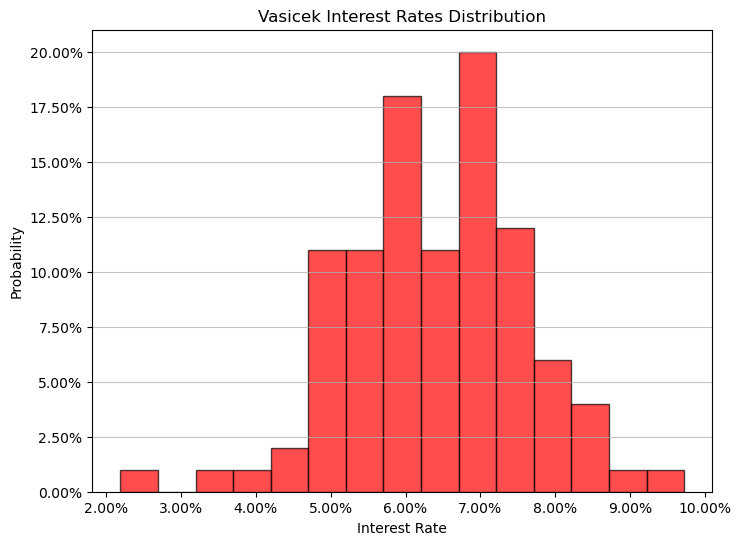

In [15]:
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm

# Assuming Benchmark_difference is a pandas Series or a NumPy array
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the histogram on the primary y-axis
counts, bins, _ = ax1.hist(rates[:, 11], bins=15, alpha=0.7, color='red', edgecolor='black', label='Histogram')
ax1.set_xlabel('Interest Rate')
ax1.set_ylabel('Probability')
plt.title('Vasicek Interest Rates Distribution')
ax1.grid(axis='y', alpha=0.75)

# Customize y-axis labels to display percentages for the histogram
def to_percentage(y, _):
    return f"{y:.2f}%"

ax1.yaxis.set_major_formatter(FuncFormatter(to_percentage))

def to_percentage_x(x, _):
    return f"{x*100:.2f}%"

ax1.xaxis.set_major_formatter(FuncFormatter(to_percentage_x))

plt.show()

In [16]:
mean_rate = np.mean(rates[:, 11])
std_dev = np.std(rates[:, 11])

In [17]:
print(mean_rate)
print(std_dev)

0.06407542481700378
0.012140944890400029
